<a href="https://colab.research.google.com/github/LAHSIVA/Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv('/content/drive/MyDrive/PROFESSIONAL/4) Machine Learning /economic_index.csv')


In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


## Drop Unnecessary columns --> year,month

In [4]:
## inplace actually deletes the column

df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
print(df_index)

    interest_rate  unemployment_rate  index_price
0            2.75                5.3         1464
1            2.50                5.3         1394
2            2.50                5.3         1357
3            2.50                5.3         1293
4            2.50                5.4         1256
5            2.50                5.6         1254
6            2.50                5.5         1234
7            2.25                5.5         1195
8            2.25                5.5         1159
9            2.25                5.6         1167
10           2.00                5.7         1130
11           2.00                5.9         1075
12           2.00                6.0         1047
13           1.75                5.9          965
14           1.75                5.8          943
15           1.75                6.1          958
16           1.75                6.2          971
17           1.75                6.1          949
18           1.75                6.1          884


## Check Null Values

In [6]:
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


## Seaborn Representation

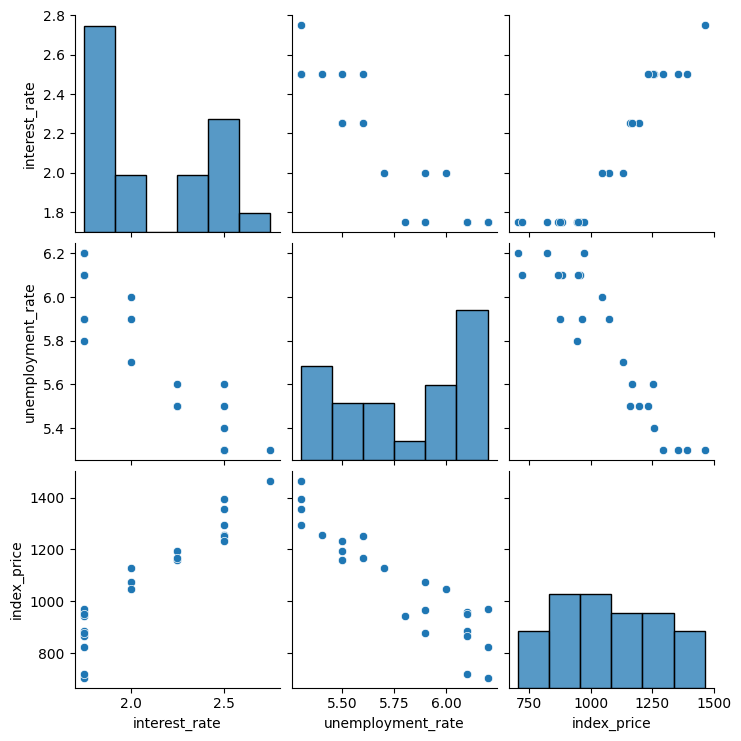

In [7]:
import seaborn as sns
sns.pairplot(df_index)

## Correlation

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


## Visualize datapoints

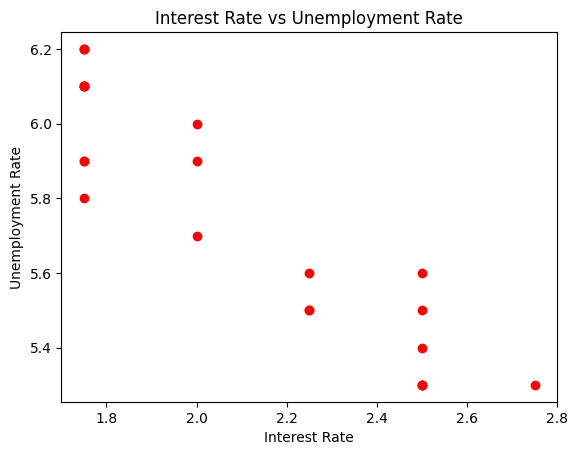

In [11]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate')
plt.show()

## Independent and dependent feature

In [12]:
X=df_index.iloc[:,:-1] ## other than last value -->Independent
y=df_index.iloc[:,-1]  ## last column --> Dependent

In [14]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [15]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


## Train test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [19]:
import seaborn as sns

## interest_rate vs index_price

<Axes: xlabel='interest_rate', ylabel='index_price'>

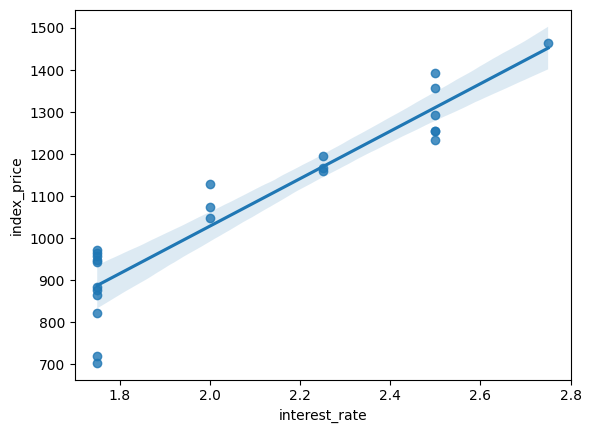

In [21]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

## interest_rate vs unemployment_rate

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

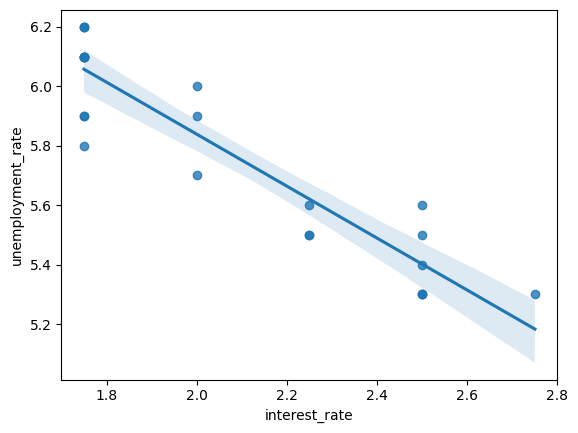

In [22]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

## index_price vs unemplyment_rate

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

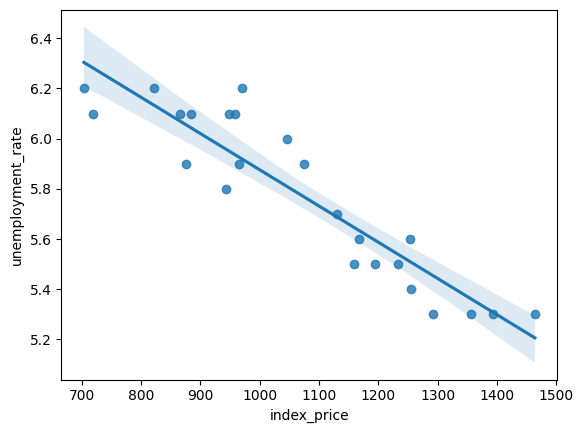

In [23]:
sns.regplot(x='index_price', y='unemployment_rate', data=df_index)

## Preprocessing Standardisation

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [25]:
X_train


array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [26]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

## Cross val score --> Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [29]:
validation_score ## Getting three validation score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [30]:
np.mean(validation_score) ## Getting average of validation score

-5914.828180162386

## Prediction

In [35]:
y_pred=regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

## Performance Metrics

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R2 Score:",rmse)

Mean Squared Error: 8108.567426306604
Mean Absolute Error: 73.80444932337097
R2 Score: 90.04758423359621


In [38]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2_score",score)

r2_score 0.7591371539010257


## Assumptions

Text(0.5, 1.0, 'Actual vs Predicted')

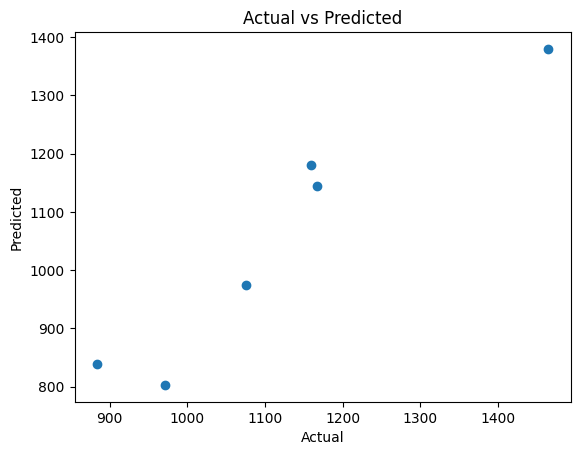

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [41]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


## plot this residuals

<Axes: xlabel='index_price', ylabel='Density'>

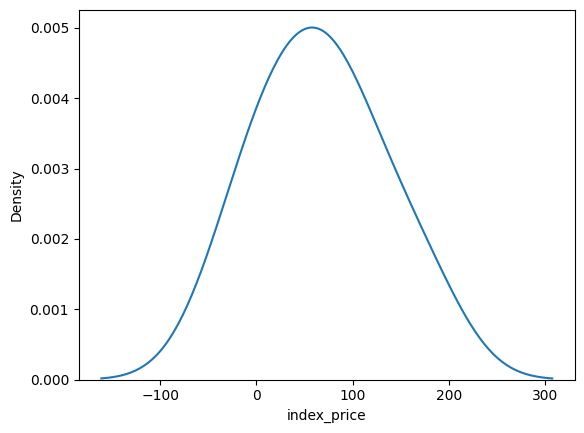

In [43]:
sns.kdeplot(residuals) ## Normal Distribution Model is good

## Create scatter plot wrt to prediction and residuals

Text(0.5, 1.0, 'Predicted vs Residuals')

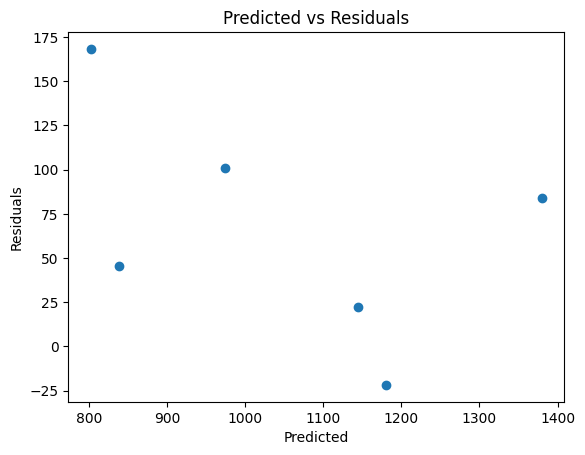

In [44]:
plt.scatter(y_pred,residuals) ## Uniformly Distributed model is good
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')

## OLS Linear Regression

In [45]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [46]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 19 Dec 2024   Prob (F-statistic):                       0.754
Time:                        15:21:05   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
print(regression.coef_)

[  88.27275507 -116.25716066]
